<a href="https://colab.research.google.com/github/amjadraza/spark-ml-course/blob/main/week-1/Session_2_Getting_Started_spark_3_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the course: Machine Learning with Spark

This course is offered by in collaboration of  [AI-LOUNG](http://ai-lounge.com/) & [Datafy2AI](https://www.datafy2ai.com/)

Instructor: [Dr. Muhammad Amjad Raza](https://www.linkedin.com/in/amjadraza/)

## Refresher:


1.   What is Spark?
2.   Setting Up Spark within Google Colab Environment
3.   Readings/Tutorial 


## Learning Objective of this Session:


1.   Basics of Spark Operations?
2.   Spark DataFrame API using PySpark

# What is SPARK?





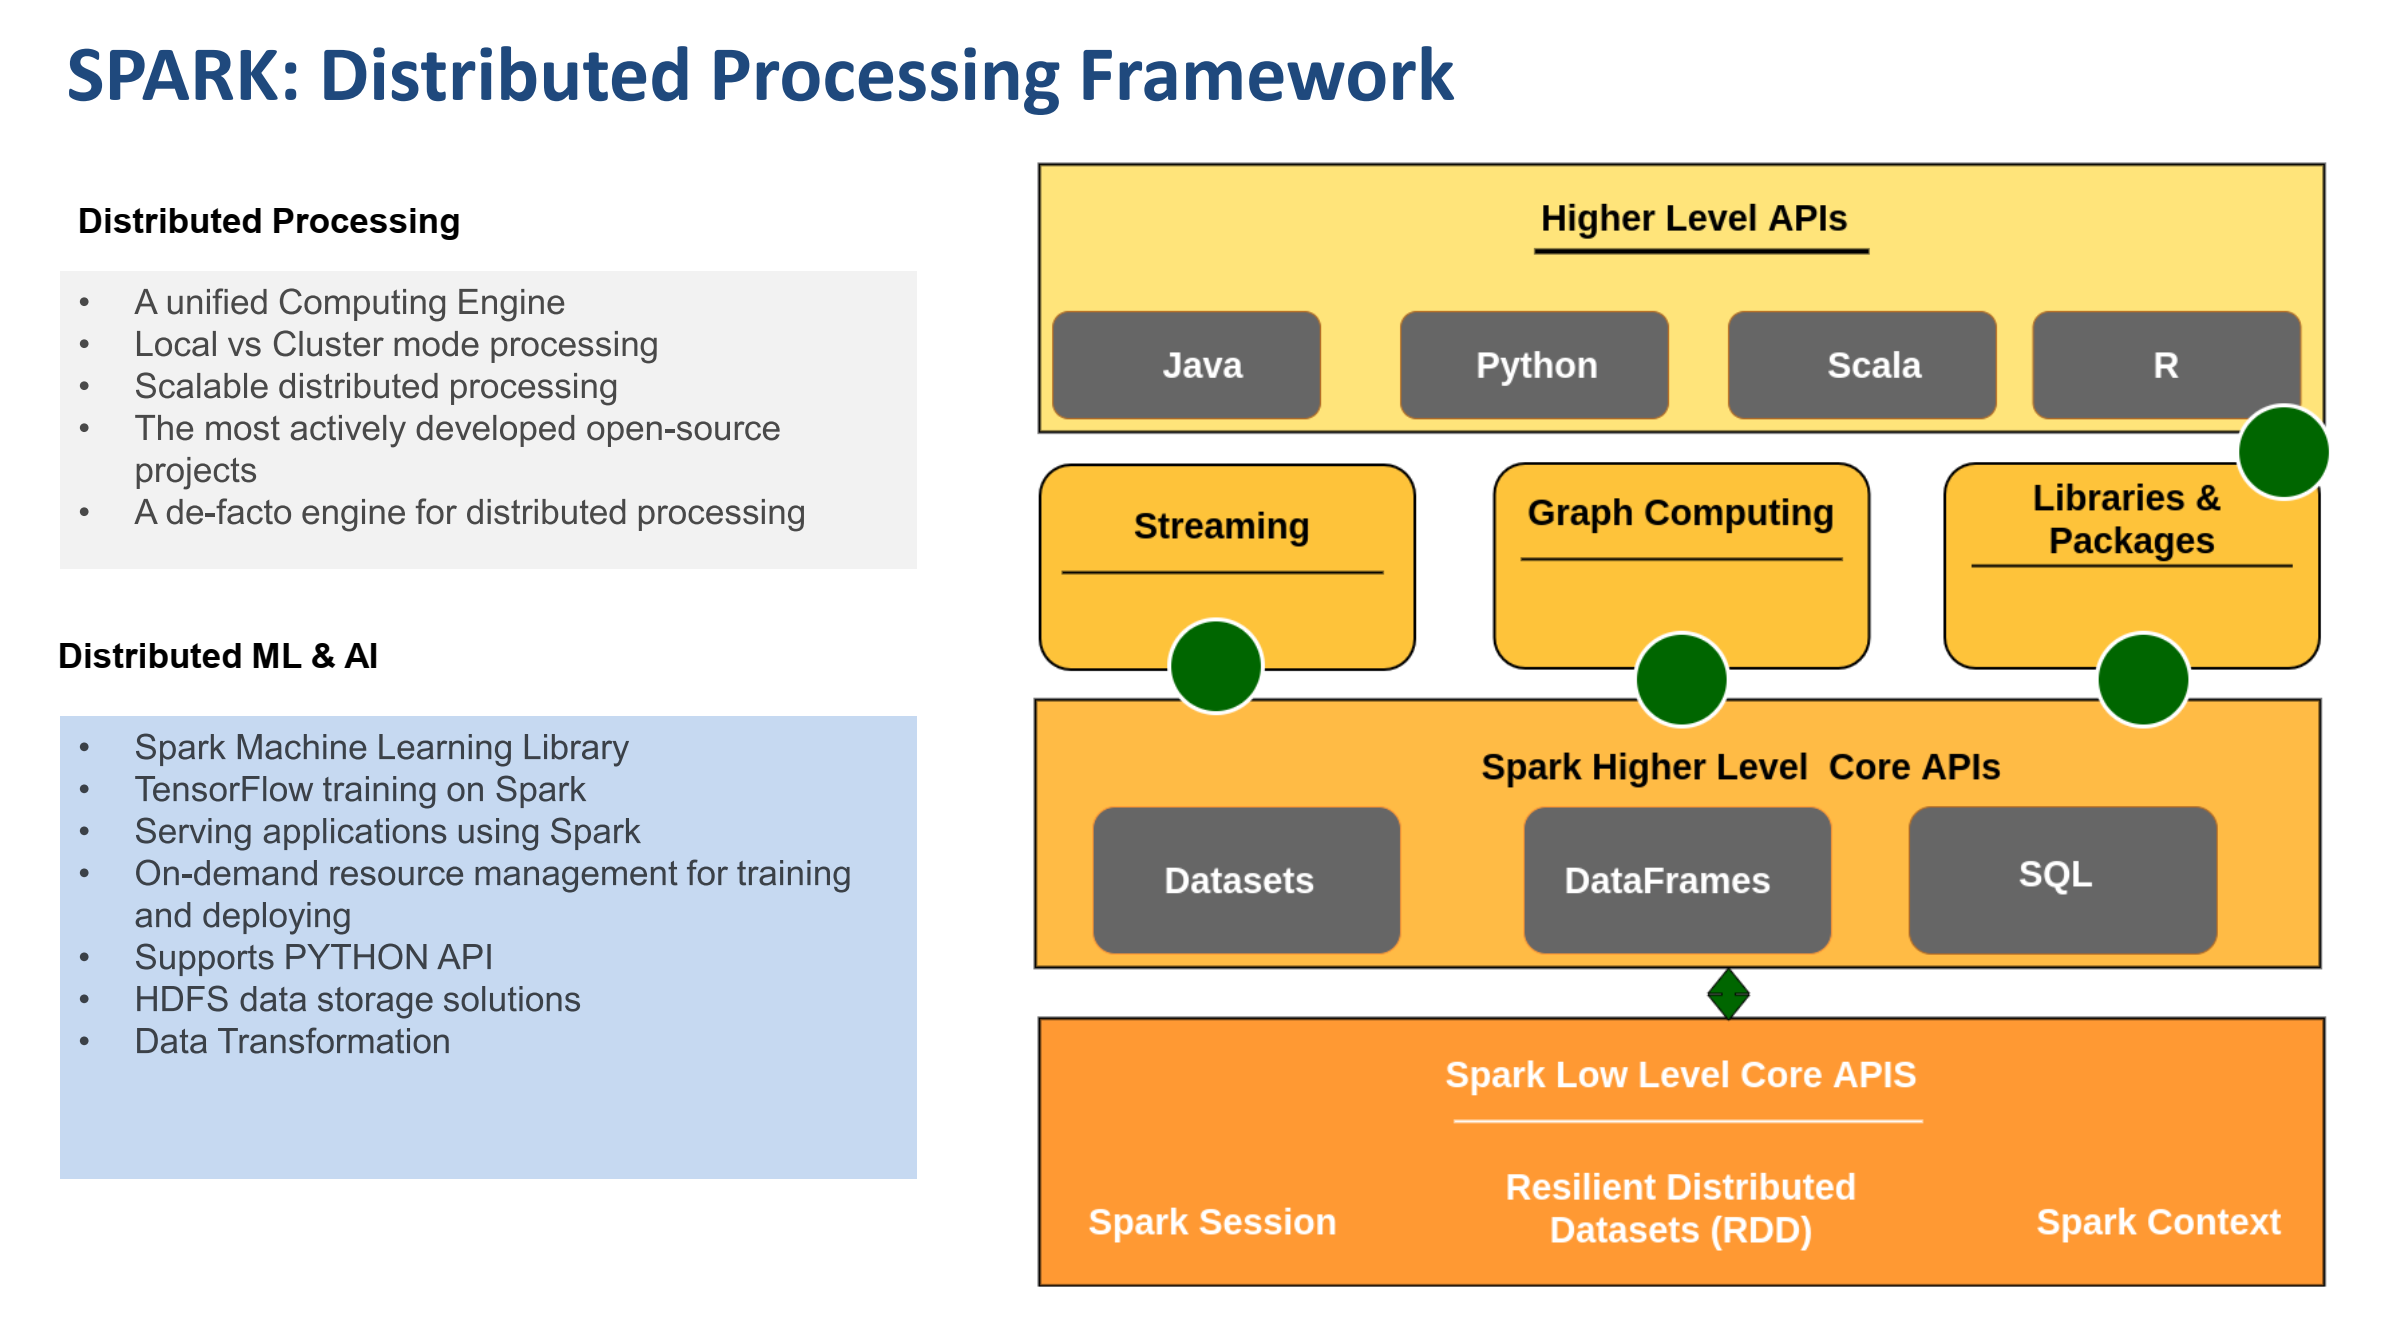

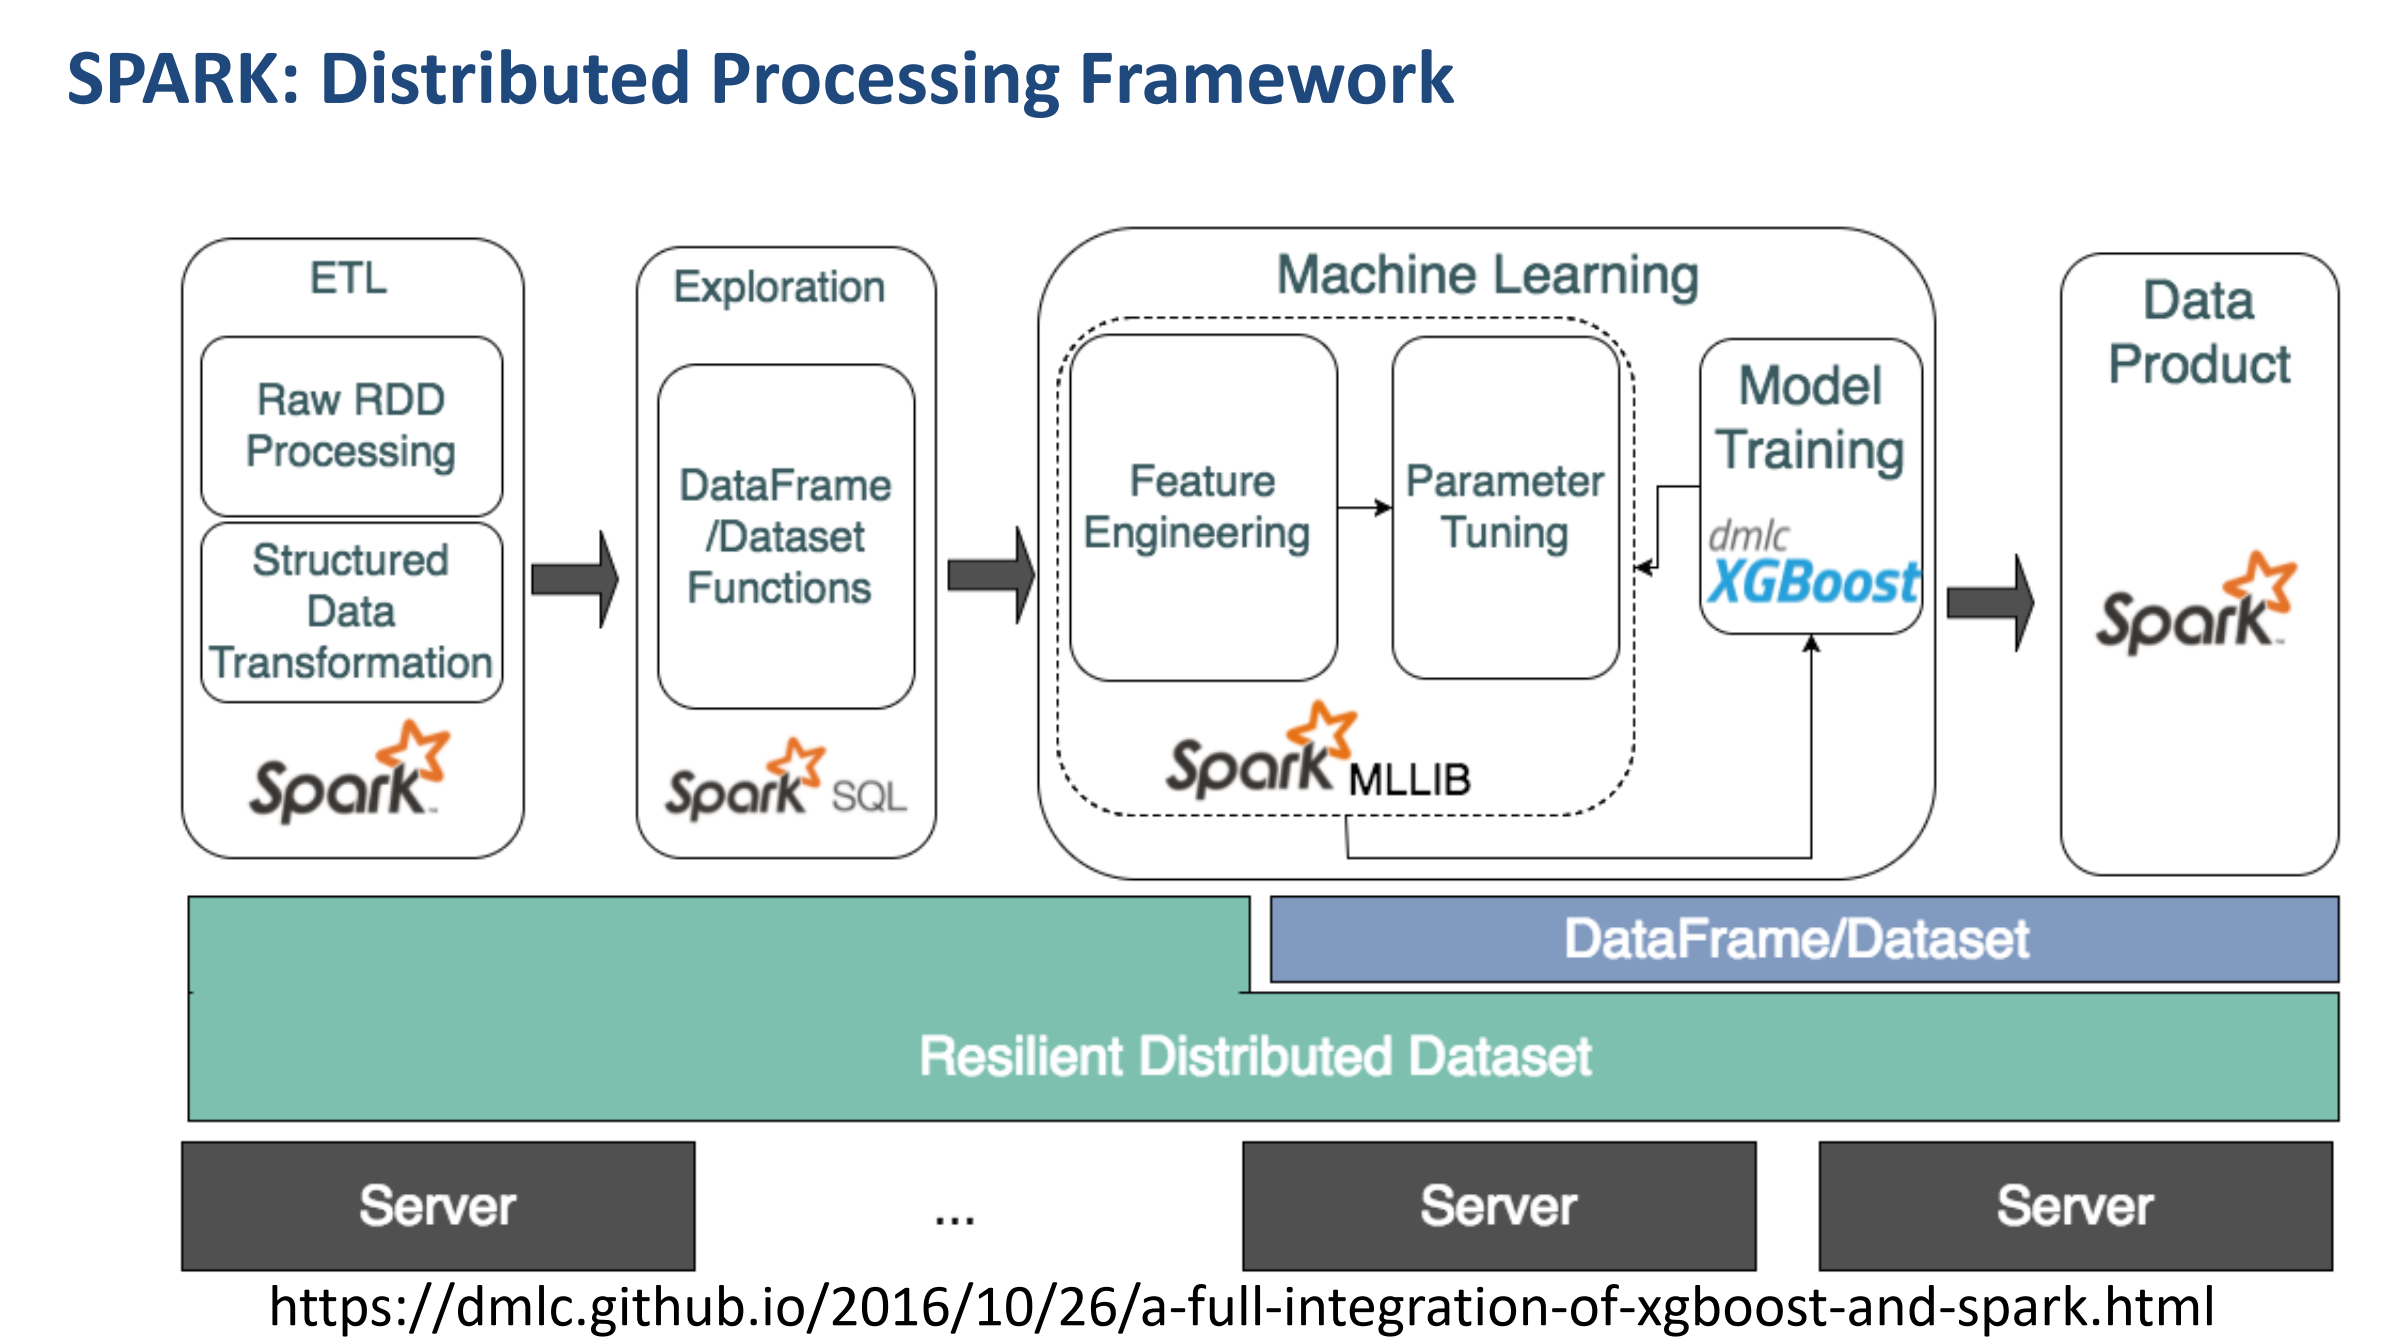

#[Getting Started With Apache Spark 3.x.x](https://medium.com/analytics-vidhya/getting-started-spark3-0-0-with-google-colab-9796d350d78)

#[Apache Spark 3.1.1 with Google Colab](http://apache.osuosl.org/spark/spark-3.1.1/)

**Author: MA Raza**

This is the working google collaboratory notebook example of setting up  recently release spark 3.1.1 in google colab. 

* Installing Java in the Google Colaboratory
* Setting up Spark 3.1.1 in the Google Colaboratory
* A test example

**References:**

1. http://apache.osuosl.org/spark/spark-3.1.1/
2. https://medium.com/@sushantgautam_930/apache-spark-in-google-collaboratory-in-3-steps-e0acbba654e6
3. https://notebooks.gesis.org/binder/jupyter/user/databricks-koalas-kuv5qckt/notebooks/docs/source/getting_started/10min.ipynb
4. https://medium.com/@amjadraza24/getting-started-spark3-0-0-with-google-colab-9796d350d78



# Setting up Spark 3.1.1 in the Google Colaboratory

This notebook comprises the instructions to run Sprak and pyspark in google colabboratory framework. 

We will be running the excises of  some basic functions on using koalas

We will install below programs

* Java 8
* spark-3.1.1
* Hadoop3.2 
* [Findspark](https://github.com/minrk/findspark)


This installs Apache Spark 3.1.1, Java 8, and [Findspark](https://github.com/minrk/findspark), a library that makes it easy for Python to find Spark.

Run below set of commands to install spark. 

**Change the location/version of spark version of your choice**

**[Apache Spark in Google Collaboratory In 3 steps.](https://medium.com/@sushantgautam_930/apache-spark-in-google-collaboratory-in-3-steps-e0acbba654e6)**

> Make sure the spark-version you are downloading is availbale on target link



In [ ]:
# Run below commands
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
! ls -a

.   .config	 spark-3.1.1-bin-hadoop3.2
..  sample_data  spark-3.1.1-bin-hadoop3.2.tgz


In [ ]:
! ls spark-3.1.1-bin-hadoop3.2/bin

beeline		      pyspark		spark-class.cmd   spark-sql
beeline.cmd	      pyspark2.cmd	sparkR		  spark-sql2.cmd
docker-image-tool.sh  pyspark.cmd	sparkR2.cmd	  spark-sql.cmd
find-spark-home       run-example	sparkR.cmd	  spark-submit
find-spark-home.cmd   run-example.cmd	spark-shell	  spark-submit2.cmd
load-spark-env.cmd    spark-class	spark-shell2.cmd  spark-submit.cmd
load-spark-env.sh     spark-class2.cmd	spark-shell.cmd


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

## Spark Installation test
Lets test the installation of spark in our google colab environment. 

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession \
        .builder \
        .master("local[*]")\
        .appName('spark-ml') \
        .getOrCreate()
# Test the spark 
df = spark.createDataFrame([{"hello": "world"} for x in range(1000)])

df.show(3, False)


+-----+
|hello|
+-----+
|world|
|world|
|world|
+-----+
only showing top 3 rows



In [ ]:
df.printSchema

<bound method DataFrame.printSchema of DataFrame[hello: string]>

In [ ]:
spark

In [ ]:
# Check the pyspark version
import pyspark
print(pyspark.__version__)

3.1.1


# Spark: Quick Start
Having everyone able to run the spark instance in Google Colab, let us get hands on with the basic functionalities of Spark. Since, our focus is mostly on DataFrame API therefore we learn about it in this session.

* Master node distribute the tasks to executor nodes
* We call this Spark Cluster
* Entry of the app is always Driver Program
* Scala is the native programming language for Spark
* Hadoop file system is the native file storage system

** Spark use lazy operation i.e plan the execution and start executing from the start. Does not save the intermediate results for future use. To save intermediate results, we use *`persist`* method on RDDs/DataFrames.





## Spark Cluster and Executor Management

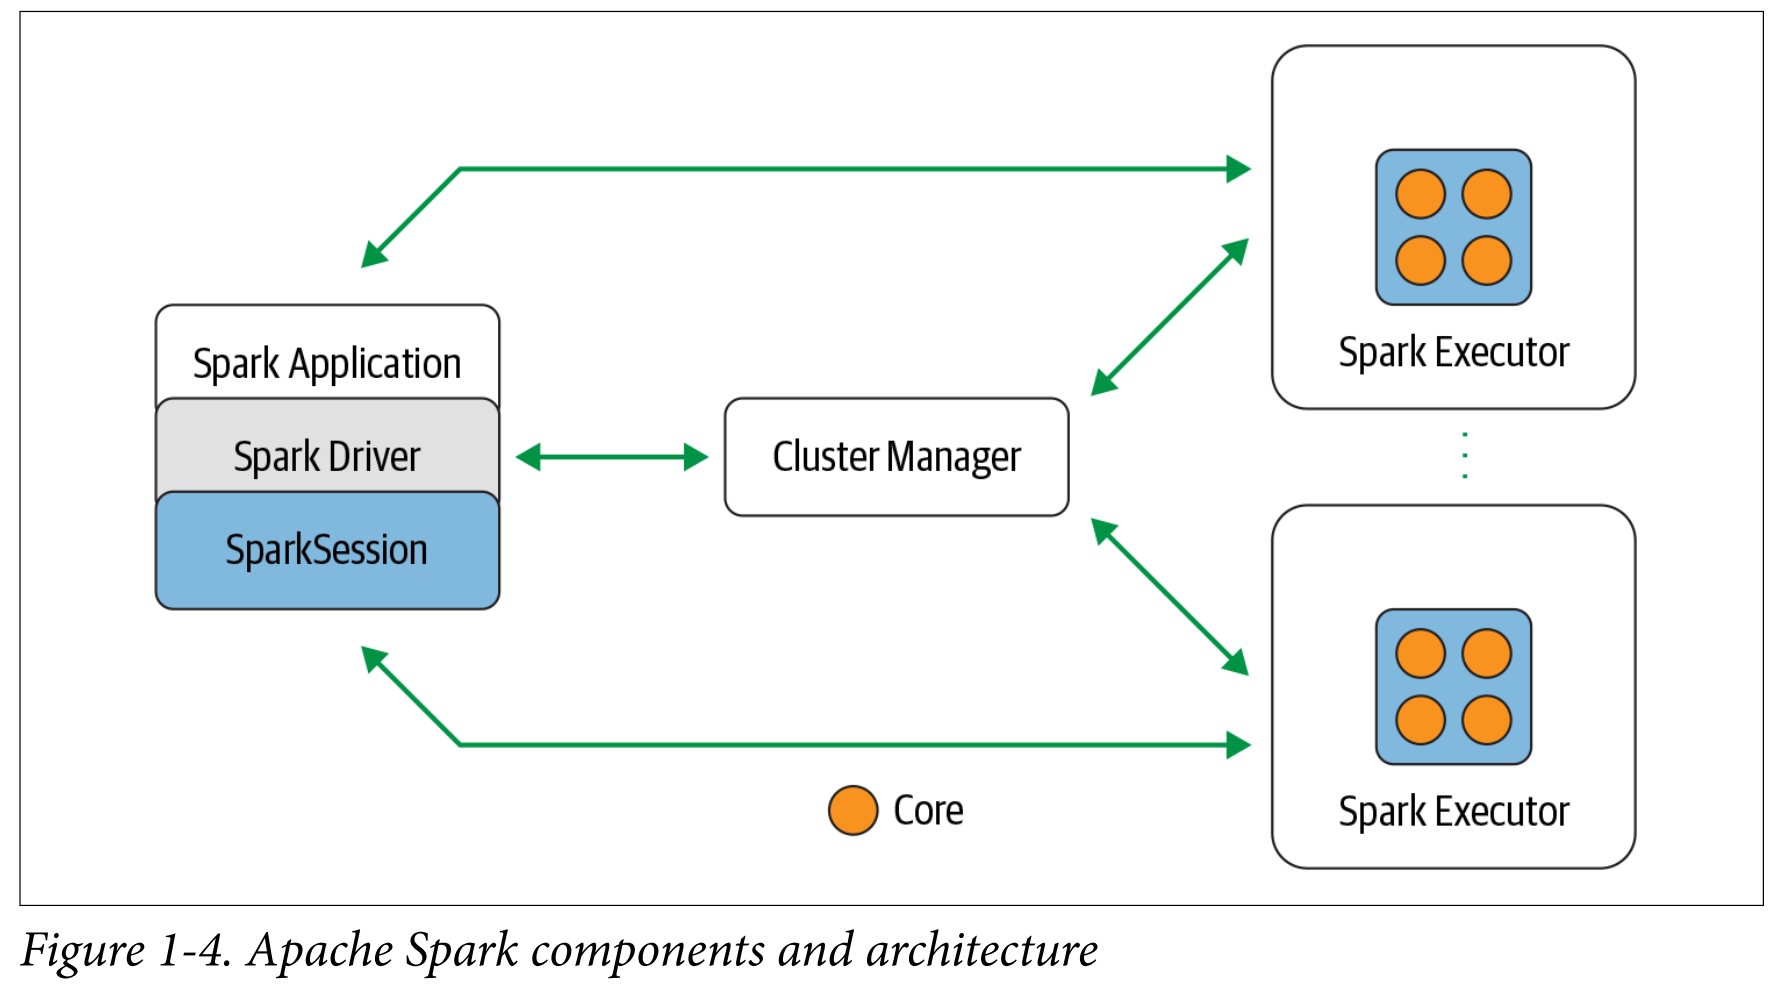

### Spark Distribution of Tasks
Spark driver distributes the tasks to its executors after optimising the programe execution flow. The number of partitions of the data is key in distributing tasks. 

* Data is logically partitioned and stored on cluster machines
* The number of partitions can be a proxy of parallelism 
* User can assign the number of cores and Memory to each Executor


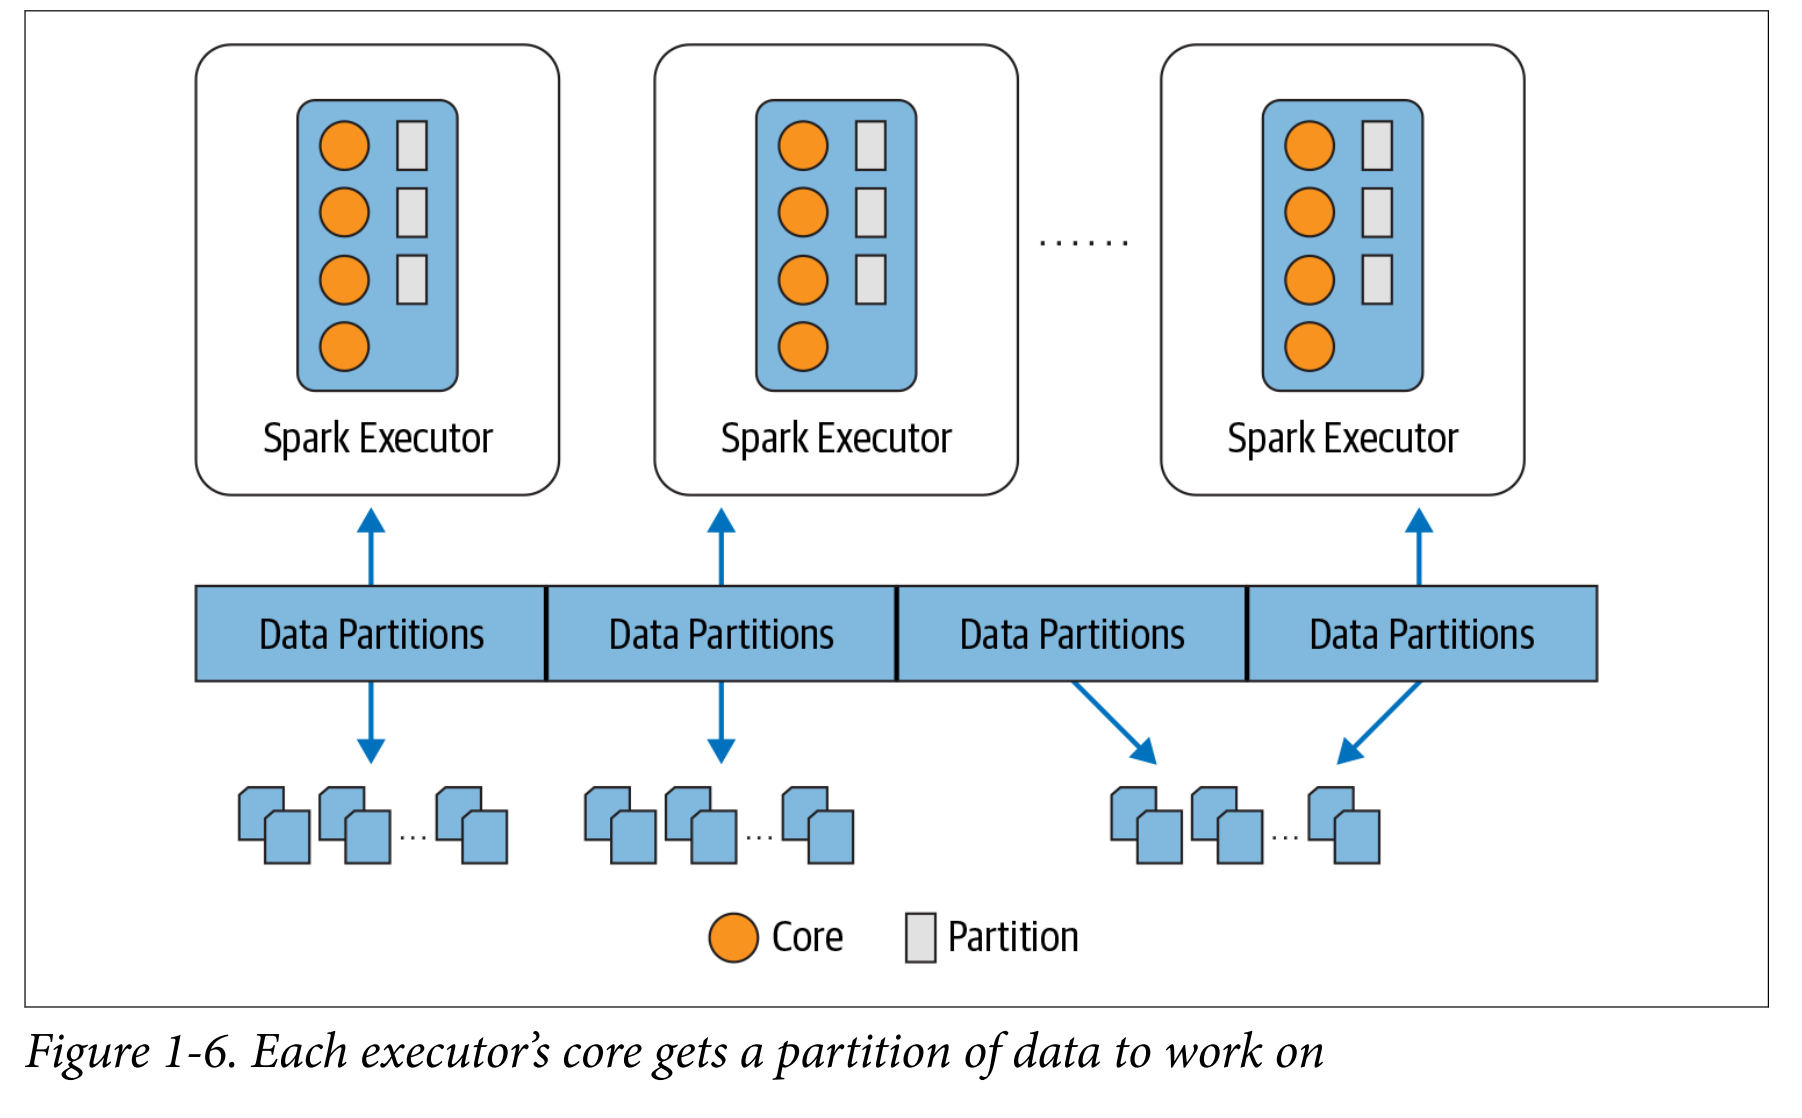

### Spark Application Life Cycle

#### Spark Jobs
Driver Converts Sparkk application into Spark Jobs
Each Job into Directed Acyclic Graphs(DAG)

#### Spark Stages 

* Stages are created based on operations and its sequence
* It can be single or multple stages

#### Spark Tasks

* Stages are converted into Tasks (A unit of Execution)
* Each Task is mapped to a Single Executor Core and works on single partition of data

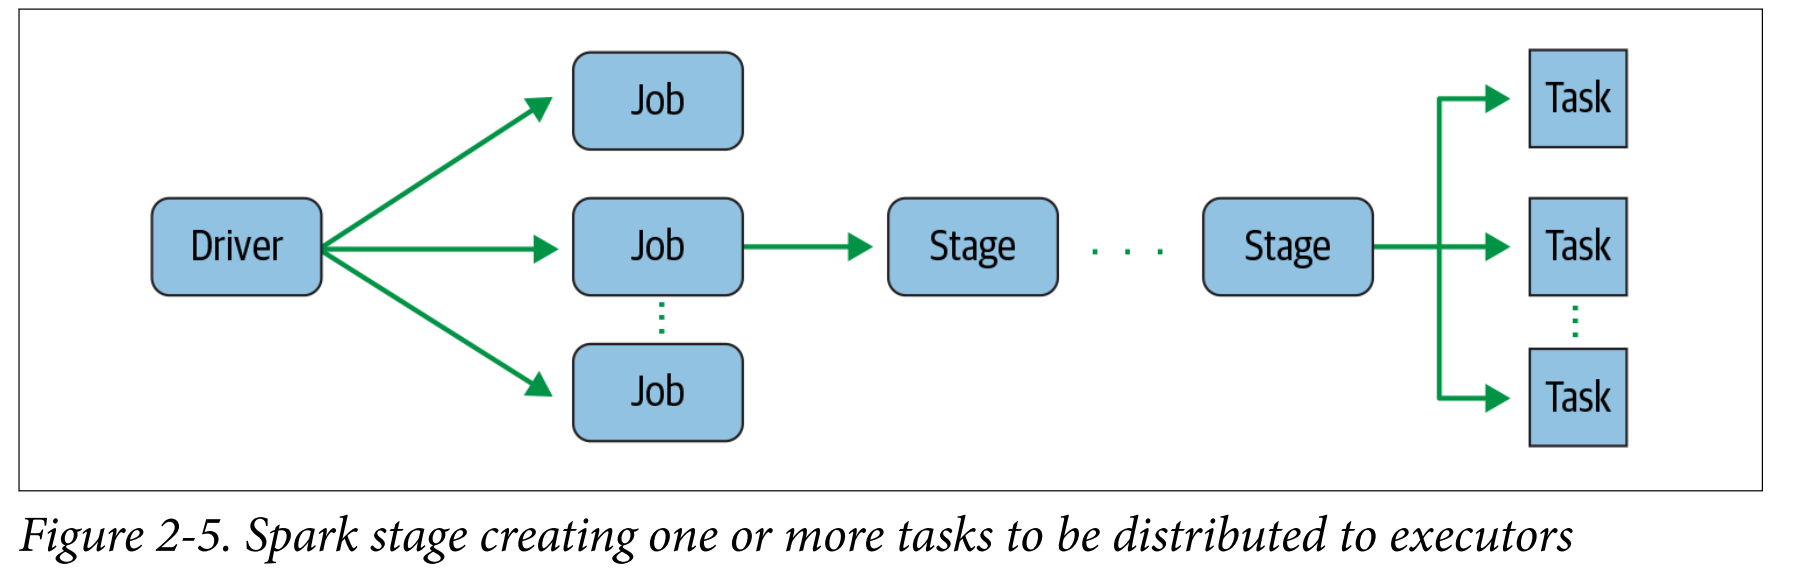

## Transform, Action and Lazy Operations

Spark is famous for its well planned execution and lazy operaion.

* Operations are evaluated and remembered but not executed like normal execution untill Action is called
* Actions triggers the evaluations `show` is one of the common action



In [ ]:
df = pd.read(fsdfsd)
gr = df.groupby()
gr.head()


sdf = spark.read(fsdfsd)
sgr = sdf.groupby()
sgr.show() or Any Action


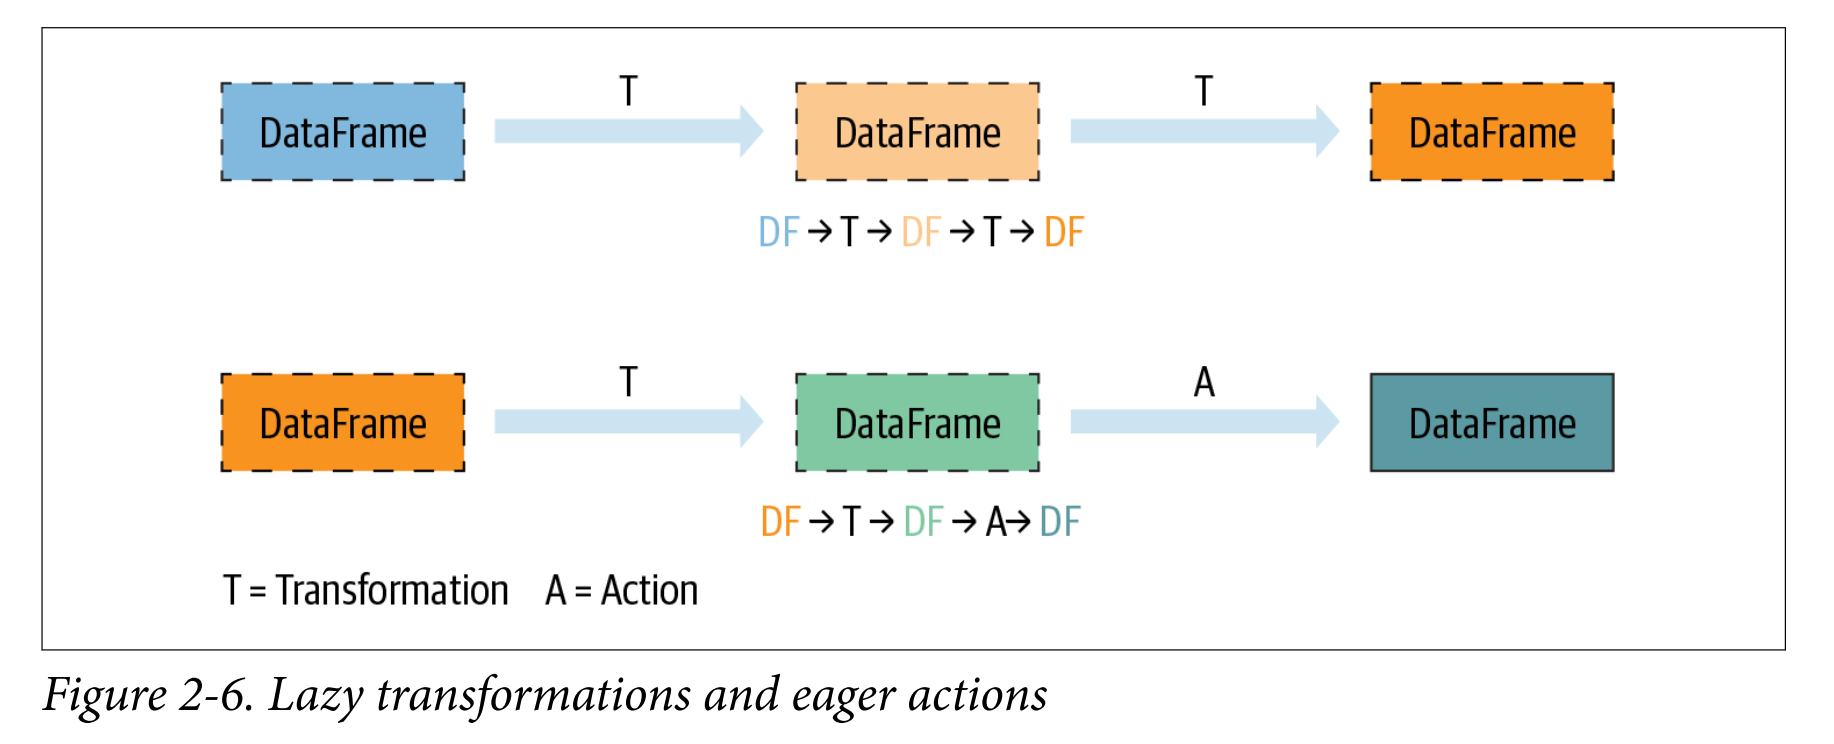

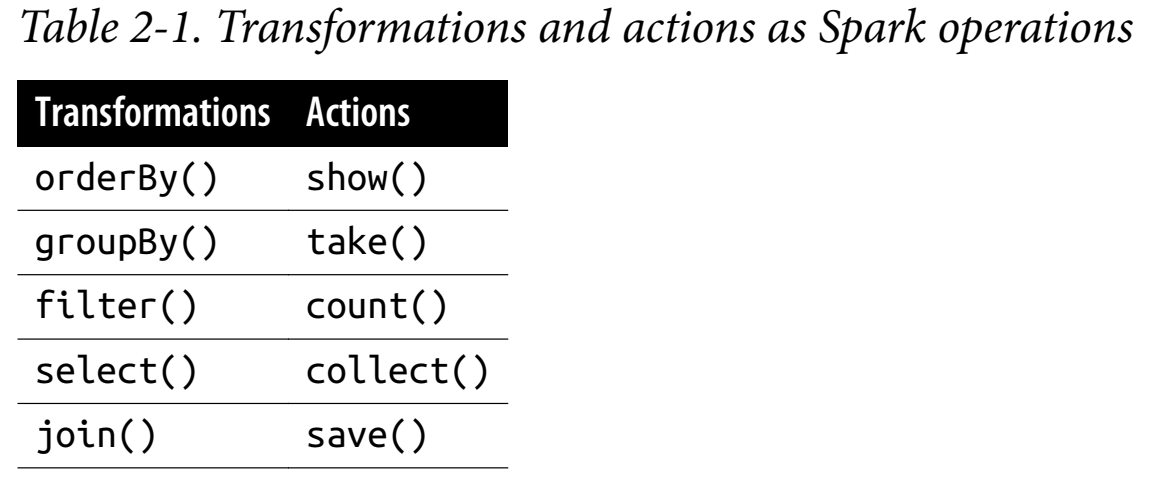

### Narrow & Wide Tranformations

While working with large distributed data, it is important to understand the execution life cycle of the app and plan the app accordingly. 

* **Narrow Transformation:** Any transformation where a single output partition can be computed
from a single input partition is a narrow transformation. For Example `filter` , `contains`

* **WideTransformation:** Any transformation where a data is shuffled across executors/partitions is a wide transformation. For example `groupBy()` or `orderBy`


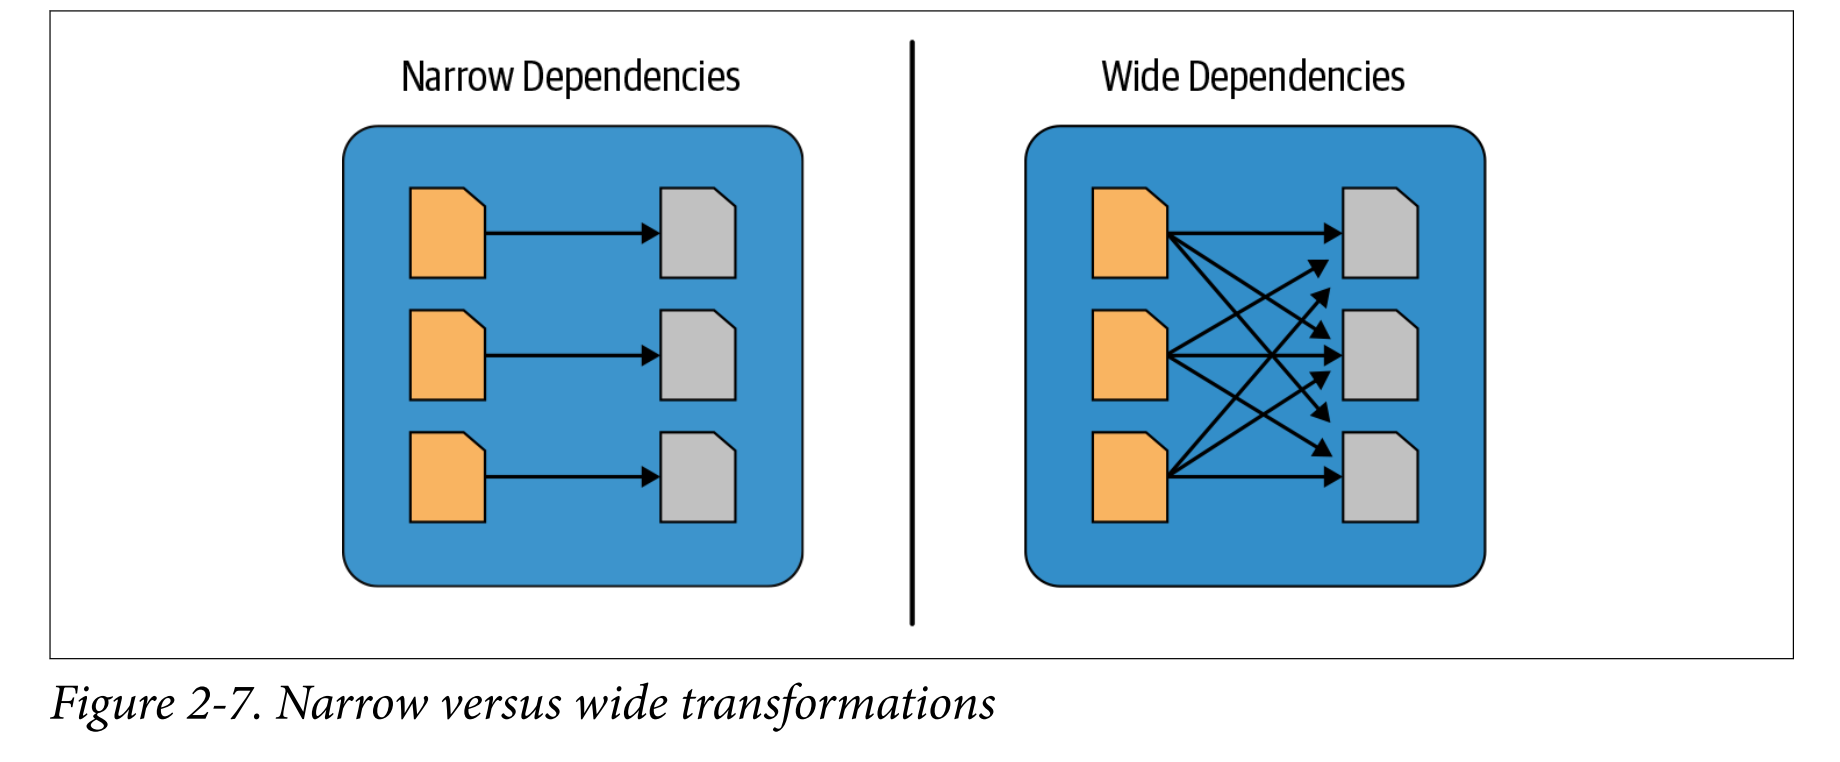

### Spark UI



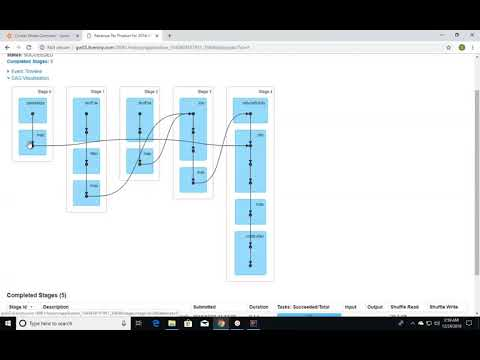

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('MygFqen8VsM')

## A. RDD: Quick Start
The main abstraction Spark provides is a resilient distributed dataset (RDD), which is a collection of elements **partitioned across the nodes** of the cluster that can be operated on in parallel.

The number of partitions are important for parallel executions, each partition resides on each node and computing as single task.

**Shared Variables**: When running an app, we can broadcast variable/functions/object for all nodes.

https://spark.apache.org/docs/latest/rdd-programming-guide.html

In [ ]:
# Import spark objects
from pyspark import SparkContext, SparkConf

In [ ]:
spark


> SparkContext object, which tells Spark how to access a cluster


---

> To create a SparkContext you first need to build a SparkConf object that contains information about your application.
---

In [ ]:
# Creating spark Context Object
sc = spark.sparkContext

In [ ]:
sc

<SparkContext master=local[*] appName=spark-ml>

In [ ]:
spark.getActiveSession()

In [ ]:
# Creating RDD
data = [1, 2, 3, 4, 5]
distData = sc.parallelize(data)

In [ ]:
distData

ParallelCollectionRDD[7] at readRDDFromFile at PythonRDD.scala:274

In [ ]:
type(distData)

pyspark.rdd.RDD

In [ ]:
# Get the number of Partitions
distData.getNumPartitions()

2

In [ ]:
# Learn the attributes of an RDD

# Practice
distData.

In [ ]:
# Adding the elements of RDD
distData.reduce(lambda a, b: a + b)

15

In [ ]:
num = sc.parallelize([4, 6, 6, 1, 3, 0, 2, 2, 2, 6, 7 , 99])

In [ ]:
num.getNumPartitions()

2

In [ ]:
# apply lambda function on RDD
result = num.map(lambda x: x**2)

In [ ]:
# Fetch 10 elements of RDD
result.take(10)

[16, 36, 36, 1, 9, 0, 4, 4, 4, 36]

In [ ]:
# Filter the elements of RDD using Lamda function
result = num.filter(lambda x: x >= 3)
result.take(10)

[4, 6, 6, 3, 6, 7, 99]

In [ ]:
# Distinct elements of RDD
result = num.distinct()
result.take(10)
[0, 1, 2, 3, 4, 6]

[0, 1, 2, 3, 4, 6]

In [ ]:
# Create an RDD
num2 = sc.parallelize([5, 5, 8, 2, 2, 1, 7, 3, 3])

In [ ]:
# Merge the elemenst of two RDD (Union)
result = num.union(num2)
result.take(20)

[4, 6, 6, 1, 3, 0, 2, 2, 2, 6, 7, 99, 5, 5, 8, 2, 2, 1, 7, 3]

In [ ]:
# Find the intersection of two RDDs
result = num.intersection(num2)
result.take(20)
[2, 1, 3]

[2, 1, 3]

A list of complete operations on RDD can be found on below link

https://spark.apache.org/docs/latest/rdd-programming-guide.html

## B. DataFrame API: Quick Start

1. DataFrame Creation
2. Viewing Data
3. Selecting and Accessing Data
4. Applying a Function
5. Grouping Data
6. Getting Data in/out

In [ ]:
# Data Frame Creation using Row
from datetime import datetime, date
import pandas as pd
from pyspark.sql import Row

df = spark.createDataFrame([
    Row(a=1, b=2., c='string1', d=date(2000, 1, 1), e=datetime(2000, 1, 1, 12, 0)),
    Row(a=2, b=3., c='string2', d=date(2000, 2, 1), e=datetime(2000, 1, 2, 12, 0)),
    Row(a=4, b=5., c='string3', d=date(2000, 3, 1), e=datetime(2000, 1, 3, 12, 0))
])
df

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

In [ ]:
type(df)

pyspark.sql.dataframe.DataFrame

In [ ]:
# Display/Show the DataFrame: Action
df.show()

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|
|  2|3.0|string2|2000-02-01|2000-01-02 12:00:00|
|  4|5.0|string3|2000-03-01|2000-01-03 12:00:00|
+---+---+-------+----------+-------------------+



In [ ]:
# Show limited number of records
df.show(2, False)

+---+---+-------+----------+-------------------+
|a  |b  |c      |d         |e                  |
+---+---+-------+----------+-------------------+
|1  |2.0|string1|2000-01-01|2000-01-01 12:00:00|
|2  |3.0|string2|2000-02-01|2000-01-02 12:00:00|
+---+---+-------+----------+-------------------+
only showing top 2 rows



In [ ]:
# print Schema of the Spark DataFrame
df.printSchema()

root
 |-- a: long (nullable = true)
 |-- b: double (nullable = true)
 |-- c: string (nullable = true)
 |-- d: date (nullable = true)
 |-- e: timestamp (nullable = true)



In [ ]:
# Columns of the DataFrame
df.columns

['a', 'b', 'c', 'd', 'e']

In [ ]:
# Creating Spark DataFrame from Pandas DataFrame
pandas_df = pd.DataFrame({
    'a': [1, 2, 3],
    'b': [2., 3., 4.],
    'c': ['string1', 'string2', 'string3'],
    'd': [date(2000, 1, 1), date(2000, 2, 1), date(2000, 3, 1)],
    'e': [datetime(2000, 1, 1, 12, 0), datetime(2000, 1, 2, 12, 0), datetime(2000, 1, 3, 12, 0)]
})
# Convert Pandas Dataframe to Spark DataFrame
df = spark.createDataFrame(pandas_df)
df

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

In [ ]:
pandas_df.head()

,a,b,c,d,e
0,1,2.0,string1,2000-01-01,2000-01-01 12:00:00
1,2,3.0,string2,2000-02-01,2000-01-02 12:00:00
2,3,4.0,string3,2000-03-01,2000-01-03 12:00:00


In [ ]:
# Show elements
df.show(3, False)

+---+---+-------+----------+-------------------+
|a  |b  |c      |d         |e                  |
+---+---+-------+----------+-------------------+
|1  |2.0|string1|2000-01-01|2000-01-01 12:00:00|
|2  |3.0|string2|2000-02-01|2000-01-02 12:00:00|
|3  |4.0|string3|2000-03-01|2000-01-03 12:00:00|
+---+---+-------+----------+-------------------+



In [ ]:
type(df), type(pandas_df)

(pyspark.sql.dataframe.DataFrame, pandas.core.frame.DataFrame)

In [ ]:
pandas_df.head(-1)

,a,b,c,d,e
0,1,2.0,string1,2000-01-01,2000-01-01 12:00:00
1,2,3.0,string2,2000-02-01,2000-01-02 12:00:00


In [ ]:
# What will happen??
df.show(-1)

# Answer in your assignment

+---+---+---+---+---+
|  a|  b|  c|  d|  e|
+---+---+---+---+---+
+---+---+---+---+---+
only showing top 0 rows



In [ ]:
# Create Spark DataFrame  from Spark RDD
rdd = spark.sparkContext.parallelize([
    (1, 2., 'string1', date(2000, 1, 1), datetime(2000, 1, 1, 12, 0)),
    (2, 3., 'string2', date(2000, 2, 1), datetime(2000, 1, 2, 12, 0)),
    (3, 4., 'string3', date(2000, 3, 1), datetime(2000, 1, 3, 12, 0))
])
df = spark.createDataFrame(rdd, schema=['a', 'b', 'c', 'd', 'e'])
df

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

In [ ]:
type(rdd), type(df)

(pyspark.rdd.RDD, pyspark.sql.dataframe.DataFrame)

In [ ]:
# Describe DataFrame
df.describe()

DataFrame[summary: string, a: string, b: string, c: string]

In [ ]:
df.printSchema()

root
 |-- a: long (nullable = true)
 |-- b: double (nullable = true)
 |-- c: string (nullable = true)
 |-- d: date (nullable = true)
 |-- e: timestamp (nullable = true)



In [ ]:
df.show()

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|
|  2|3.0|string2|2000-02-01|2000-01-02 12:00:00|
|  3|4.0|string3|2000-03-01|2000-01-03 12:00:00|
+---+---+-------+----------+-------------------+



### Selection of Spark DataFrames

In [ ]:
select_columns = ["a", "b", "c"]
df.select(select_columns) \
  .describe() \
  .show(2,False)

+-------+---+---+----+
|summary|a  |b  |c   |
+-------+---+---+----+
|count  |3  |3  |3   |
|mean   |2.0|3.0|null|
+-------+---+---+----+
only showing top 2 rows



In [ ]:
# DataFrame.collect() collects the distributed data to the driver side as the local data in Python
# Use it with Precaution, Usually huge data collection at Driver side is expensive
df.collect()

[Row(a=1, b=2.0, c='string1', d=datetime.date(2000, 1, 1), e=datetime.datetime(2000, 1, 1, 12, 0)),
 Row(a=2, b=3.0, c='string2', d=datetime.date(2000, 2, 1), e=datetime.datetime(2000, 1, 2, 12, 0)),
 Row(a=3, b=4.0, c='string3', d=datetime.date(2000, 3, 1), e=datetime.datetime(2000, 1, 3, 12, 0))]

In [ ]:
df.take(1)

[Row(a=1, b=2.0, c='string1', d=datetime.date(2000, 1, 1), e=datetime.datetime(2000, 1, 1, 12, 0))]

In [ ]:
# Convert Spark DataFrame to Pandas. 
df.toPandas()

,a,b,c,d,e
0,1,2.0,string1,2000-01-01,2000-01-01 12:00:00
1,2,3.0,string2,2000-02-01,2000-01-02 12:00:00
2,3,4.0,string3,2000-03-01,2000-01-03 12:00:00


## Selecting and Accessing Data

In [ ]:
from pyspark.sql import Column
from pyspark.sql.functions import upper

In [ ]:
df.a

Column<'a'>

In [ ]:
df.select(df.c).show()

+-------+
|      c|
+-------+
|string1|
|string2|
|string3|
+-------+



In [ ]:
df.show()

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|
|  2|3.0|string2|2000-02-01|2000-01-02 12:00:00|
|  3|4.0|string3|2000-03-01|2000-01-03 12:00:00|
+---+---+-------+----------+-------------------+



In [ ]:
# adding new columns
df.withColumn('upper_c', upper(df.c)) \
  .show()

+---+---+-------+----------+-------------------+-------+
|  a|  b|      c|         d|                  e|upper_c|
+---+---+-------+----------+-------------------+-------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|STRING1|
|  2|3.0|string2|2000-02-01|2000-01-02 12:00:00|STRING2|
|  3|4.0|string3|2000-03-01|2000-01-03 12:00:00|STRING3|
+---+---+-------+----------+-------------------+-------+



In [ ]:
# Filter Spark DataFrame 
df.filter(df.a == 3) \
  .show()

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  3|4.0|string3|2000-03-01|2000-01-03 12:00:00|
+---+---+-------+----------+-------------------+



## Applying a Function¶
Applying Pandas User Defined Function to Spark Dataframes is possible. However, sometime it reduces the effeciency of computing due to collecting the data to master


https://databricks.com/blog/2020/05/20/new-pandas-udfs-and-python-type-hints-in-the-upcoming-release-of-apache-spark-3-0.html

In [ ]:
import pandas
from pyspark.sql.functions import pandas_udf

@pandas_udf('long')
def pandas_plus_one(series: pd.Series) -> pd.Series:
    # Simply plus one by using pandas Series.
    return series + 1

df.select(pandas_plus_one(df.a)).show()

+------------------+
|pandas_plus_one(a)|
+------------------+
|                 2|
|                 3|
|                 4|
+------------------+



In [ ]:
# Another way
def pandas_filter_func(iterator):
    for pandas_df in iterator:
        yield pandas_df[pandas_df.a == 1]

df.mapInPandas(pandas_filter_func, schema=df.schema).show()

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|
+---+---+-------+----------+-------------------+



## Grouping Data

Grouping data in most common operation in spark 


In [ ]:
df = spark.createDataFrame([
    ['red', 'banana', 1, 10], ['blue', 'banana', 2, 20], ['red', 'carrot', 3, 30],
    ['blue', 'grape', 4, 40], ['red', 'carrot', 5, 50], ['black', 'carrot', 6, 60],
    ['red', 'banana', 7, 70], ['red', 'grape', 8, 80]], schema=['color', 'fruit', 'v1', 'v2'])
df.show()

+-----+------+---+---+
|color| fruit| v1| v2|
+-----+------+---+---+
|  red|banana|  1| 10|
| blue|banana|  2| 20|
|  red|carrot|  3| 30|
| blue| grape|  4| 40|
|  red|carrot|  5| 50|
|black|carrot|  6| 60|
|  red|banana|  7| 70|
|  red| grape|  8| 80|
+-----+------+---+---+



In [ ]:
# Groupby a column
group_by = ['color']
df.groupby(group_by)\
  .avg()\
  .show()

+-----+-------+-------+
|color|avg(v1)|avg(v2)|
+-----+-------+-------+
|  red|    4.8|   48.0|
|black|    6.0|   60.0|
| blue|    3.0|   30.0|
+-----+-------+-------+



In [ ]:
# Groupby using multiple columns
group_by = ['color', 'fruit']
df.groupby(group_by)\
  .count()\
  .show()

+-----+------+-----+
|color| fruit|count|
+-----+------+-----+
| blue| grape|    1|
|black|carrot|    1|
|  red|banana|    2|
|  red| grape|    1|
|  red|carrot|    2|
| blue|banana|    1|
+-----+------+-----+



## Getting Data in/out

Reading and writing data into files


In [ ]:
df.write.format('com.databricks.spark.csv') \
  .mode('overwrite').option("header", "true").save('foo.csv')
df_csv = spark.read.csv('foo.csv', header=True)
df_csv.show()

+-----+------+---+---+
|color| fruit| v1| v2|
+-----+------+---+---+
|  red|carrot|  5| 50|
|black|carrot|  6| 60|
|  red|banana|  7| 70|
|  red| grape|  8| 80|
|  red|banana|  1| 10|
| blue|banana|  2| 20|
|  red|carrot|  3| 30|
| blue| grape|  4| 40|
+-----+------+---+---+



In [ ]:
!ls

foo.csv      sample_data		spark-3.1.1-bin-hadoop3.2.tgz
foo.parquet  spark-3.1.1-bin-hadoop3.2


In [ ]:
# Parquet
df.write \
  .mode('overwrite').option("header", "true").save('foo.parquet')
df_parquet = spark.read.parquet('foo.parquet')
df_parquet.show()

+-----+------+---+---+
|color| fruit| v1| v2|
+-----+------+---+---+
|  red|carrot|  5| 50|
|black|carrot|  6| 60|
|  red|banana|  7| 70|
|  red| grape|  8| 80|
|  red|banana|  1| 10|
| blue|banana|  2| 20|
|  red|carrot|  3| 30|
| blue| grape|  4| 40|
+-----+------+---+---+



In [ ]:
# ORC
df.write.orc('zoo.orc')
spark.read.orc('zoo.orc').show()

+-----+------+---+---+
|color| fruit| v1| v2|
+-----+------+---+---+
|  red|carrot|  5| 50|
|black|carrot|  6| 60|
|  red|banana|  7| 70|
|  red| grape|  8| 80|
|  red|banana|  1| 10|
| blue|banana|  2| 20|
|  red|carrot|  3| 30|
| blue| grape|  4| 40|
+-----+------+---+---+



# What We Learned

In this session, we have learned below

* Running spark 3.0.1 in Google Colab
* Basic Understanding of RDDs
* Basic Understanding of PySpark DataFrame API


## Part A: Homework/Assignment
Data : https://opendata.com.pk/dataset/corona-virus-pakistan-dataset-2020

Download the Covid19 dataset for Pakistan and save in your Google Drive (preferably)

* Load the data with Spark
* Save the copy in `Parquet` and `ORC` format
* Clean/transform the data if needed.


### Answer Below Questions

1. Plot the cummulative Suspected Cases/Tests/Admitted/Deaths/Recovered/
2. Group by cases based on States and other columns
3. Find the mean and median cases per day across Pakistan and different states Plot them for better visualization. 
4. Perform other analysis as you may think contribute in your learning

> All these exercises must be done using Spark operations and submitted in Google colab notebook format through LMS. 

**Due Date: 20:00 hrs 12/04/2021** 


# Reference Readings

1. https://spark.apache.org/docs/latest/quick-start.html
2. Practice basic Spark Commands
3. Downlod Corona Data From below Link and perform analysis using Spark
4. PySpark API reference https://spark.apache.org/docs/latest/api/python/reference/index.html
5. https://jacobcelestine.com/knowledge_repo/colab_and_pyspark/


# [KOALAS](https://github.com/databricks/koalas): A Pandas with Spark BackEnd
Koalas is a library by Databricks to implment the functionalities of Pandas in Spark. Usually, converting to/from pandas dataframe is expensive. For data analysis, pandas functionalities are rich and adopted by almost all data scientist. 

Koalas surves those professionals with added feature of using spark backend. 

> **On upcoming spark 3.2, it will be included in official PySpark**



## Install Koalas

After installing spark and making sure, it is working, we can now install the databrick's Koalas using pip. 

In [ ]:
! pip install koalas

     |████████████████████████████████| 1.4MB 5.9MB/s 


In [ ]:
import pandas as pd
import numpy as np
import databricks.koalas as ks

In [ ]:
(pd.__version__, np.__version__, ks.__version__)

('1.1.5', '1.19.5', '1.7.0')

In [ ]:
# Creating a Koalas Series 
s = ks.Series([1, 3, 5, np.nan, 6, 8])

In [ ]:
type(s)

databricks.koalas.series.Series

In [ ]:
# Creating a Koalas, Pandas and Spark DataFrames
pdf = pd.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

sdf = spark.createDataFrame(pdf)

kdf = ks.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

In [ ]:
pdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


In [ ]:
sdf.show()

+---+---+-----+
|  a|  b|    c|
+---+---+-----+
|  1|100|  one|
|  2|200|  two|
|  3|300|three|
|  4|400| four|
|  5|500| five|
|  6|600|  six|
+---+---+-----+



In [ ]:
kdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


In [ ]:
type(sdf), type(kdf), type(pdf)

(pyspark.sql.dataframe.DataFrame,
 databricks.koalas.frame.DataFrame,
 pandas.core.frame.DataFrame)

### Converting Pandas to Koalas DFs

In [ ]:
dates = pd.date_range('20130101', periods=6)
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [ ]:
# Covert pandas data frmae in koalas
kdf = ks.from_pandas(pdf)

In [ ]:
kdf.head()

,A,B,C,D
2013-01-01,0.797171,0.358659,-0.668032,1.362885
2013-01-02,0.479031,0.439178,0.147586,-1.404134
2013-01-03,1.560317,-0.025984,0.444413,-0.073686
2013-01-04,0.910379,0.524336,0.546390,0.728095
2013-01-05,0.399925,-0.669703,0.550840,-1.544564


In [ ]:
# import matplotlib.pyplot as plt
c_sum = kdf.cumsum()
c_sum.plot()

AttributeError: ignored

In [ ]:
# !pip install plotly

     |████████████████████████████████| 13.2MB 325kB/s 


In [ ]:
import plotly
plotly.__version__

'4.4.1'

## Spark Configuration with Koalas

Since koalas is wrapper around spark, the spark configuration will impact koalas directly. You may tune the `spark.cong.get` parameters when working with Koalas.

In [ ]:
## Spark Configuration

prev = spark.conf.get("spark.sql.execution.arrow.enabled")  # Keep its default value.
ks.set_option("compute.default_index_type", "distributed")  # Use default index prevent overhead.
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings coming from Arrow optimizations.

In [ ]:
# timeit with arrow.enabled
spark.conf.set("spark.sql.execution.arrow.enabled", True)
%timeit ks.range(300000).to_pandas()

1 loop, best of 5: 265 ms per loop


In [ ]:
spark.conf.set("spark.sql.execution.arrow.enabled", False)
%timeit ks.range(300000).to_pandas()

1 loop, best of 5: 1.29 s per loop


In [ ]:
# Restore Default
ks.reset_option("compute.default_index_type")
spark.conf.set("spark.sql.execution.arrow.enabled", prev)  # Set its default value back.

## Saving and Reading Data

Koalas work very well saving and reading data in `.csv`, `.parquet` and `.orc`. 

For more deatils follow the [doc](https://koalas.readthedocs.io/en/latest/reference/io.html)

In [ ]:
# csv
kdf.to_csv('foo.csv')
ks.read_csv('foo.csv').head(10)

# parquet
kdf.to_parquet('bar.parquet')
ks.read_parquet('bar.parquet').head(10)

# spark orc
kdf.to_spark_io('zoo.orc', format="orc")
ks.read_spark_io('zoo.orc', format="orc").head(10)

,A,B,C,D
0,0.797171,0.358659,-0.668032,1.362885
1,0.479031,0.439178,0.147586,-1.404134
2,1.560317,-0.025984,0.444413,-0.073686
3,0.910379,0.524336,0.546390,0.728095
4,0.399925,-0.669703,0.550840,-1.544564
5,1.008977,1.518985,-1.049770,1.352862


## Grouping

Groupby using Kdf

In [ ]:
kdf = ks.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)}) 

In [ ]:
# Group by using kdf

In [ ]:
# Apply function using kdf



## Part B: Homework/Assignment
Data : https://opendata.com.pk/dataset/corona-virus-pakistan-dataset-2020

Download the Covid19 dataset for Pakistan and save in your Google Drive (preferably)

* Load the data with Spark
* Save the copy in `Parquet` and `ORC` format
* Clean/transform the data if needed.


### Answer Below Questions

1. Plot the cummulative Suspected Cases/Tests/Admitted/Deaths/Recovered/
2. Group by cases based on States and other columns
3. Find the mean and median cases per day across Pakistan and different states Plot them for better visualization. 
4. Perform other analysis as you may think contribute in your learning

> All these exercises must be done using KOALAS library and submitted in Google colab notebook format through LMS. 

**Due Date: 20:00 hrs 12/04/2021** 